In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
originalDf = pd.read_csv('C:\\Imp\\AIML\\Assignment\\Assignment5\\cars-dataset.csv')
originalDf.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [6]:
originalDf = originalDf.drop(originalDf.columns[0], axis=1)
originalDf.head()
originalDf.dtypes

originalDf = originalDf.replace('?', np.nan)
originalDf = originalDf.apply(lambda x: x.fillna(x.median()),axis=0)
originalDf.shape
originalDf["hp"] = originalDf.hp.astype(float)
originalDf.dtypes

cyl       int64
disp    float64
hp      float64
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

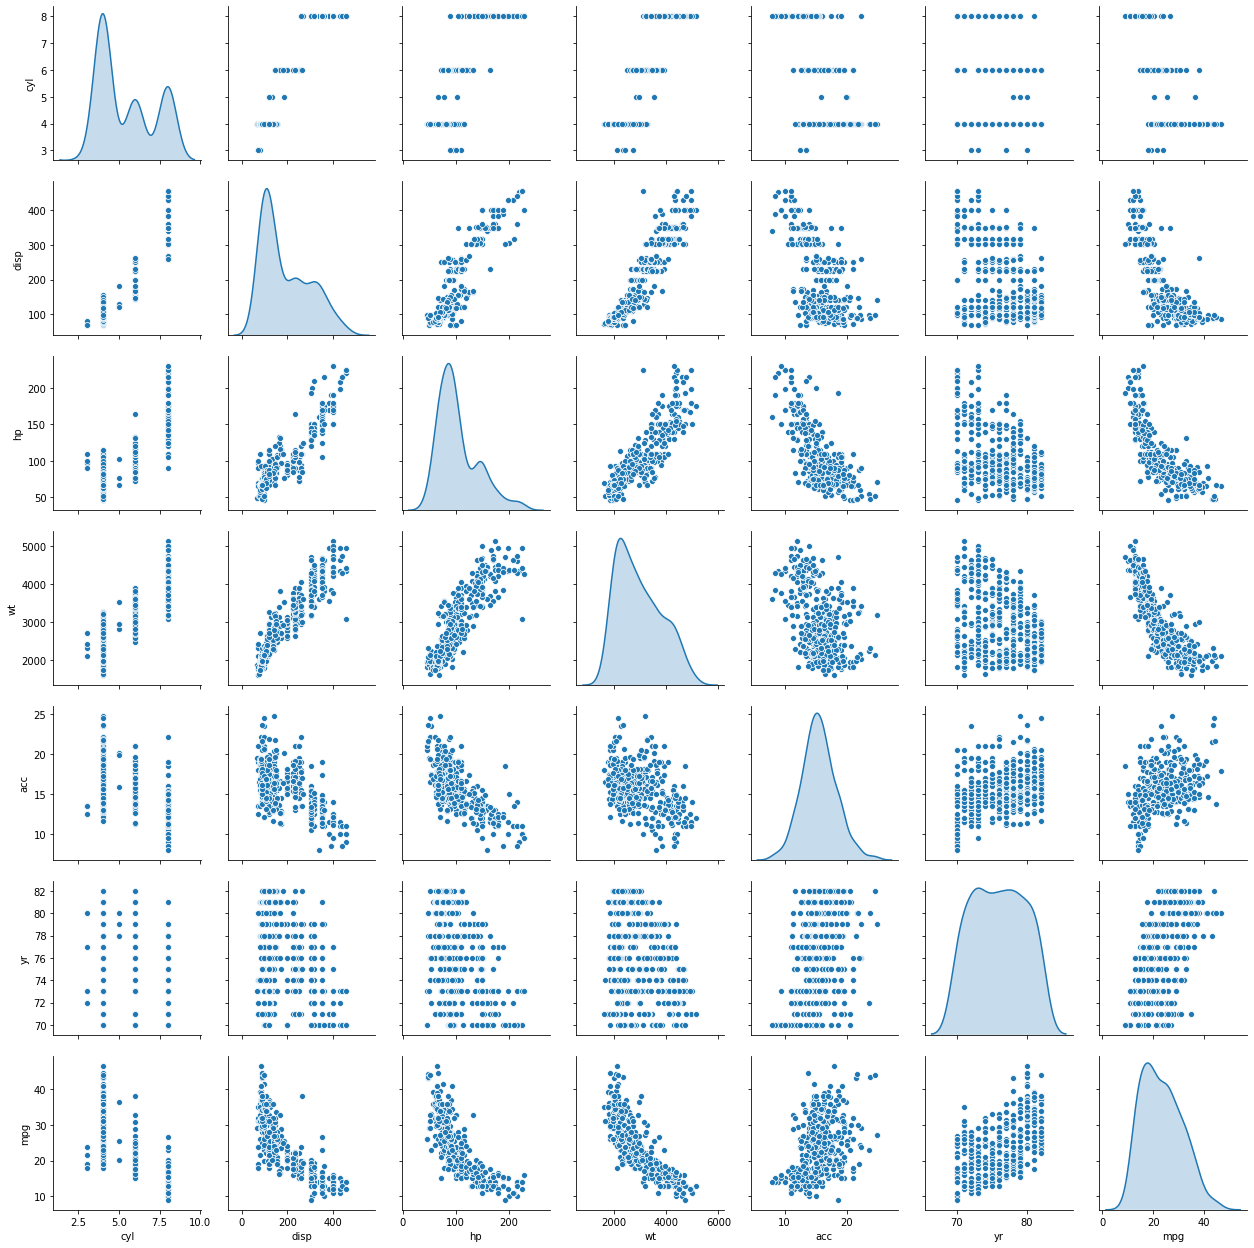

In [7]:
import seaborn as sns
sns.pairplot(originalDf,diag_kind='kde')

In [8]:
df_scaled = originalDf.apply(zscore)

In [9]:
df_scaled.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543


In [10]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, random_state=2)
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2786.000000
1,2,1294.841895
2,3,946.019791
3,4,738.393224
4,5,666.040220
5,6,597.665753
6,7,541.713750
7,8,499.609601
8,9,454.822160
9,10,422.840868


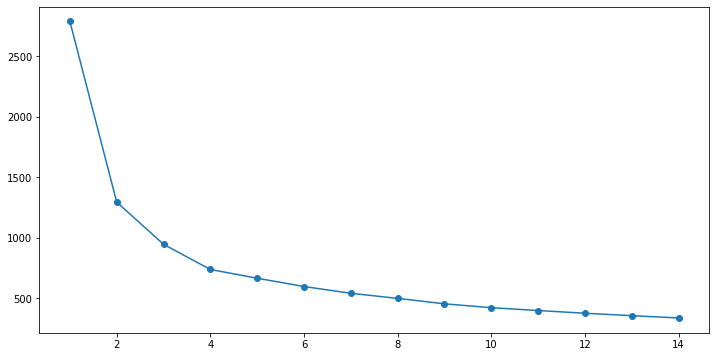

In [11]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.4972415676228483


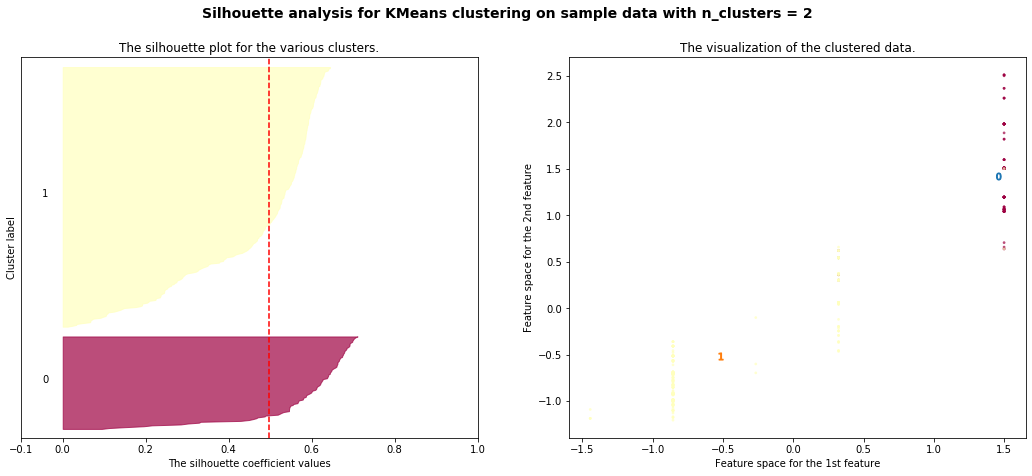

For n_clusters = 3 The average silhouette_score is : 0.34742463843935756


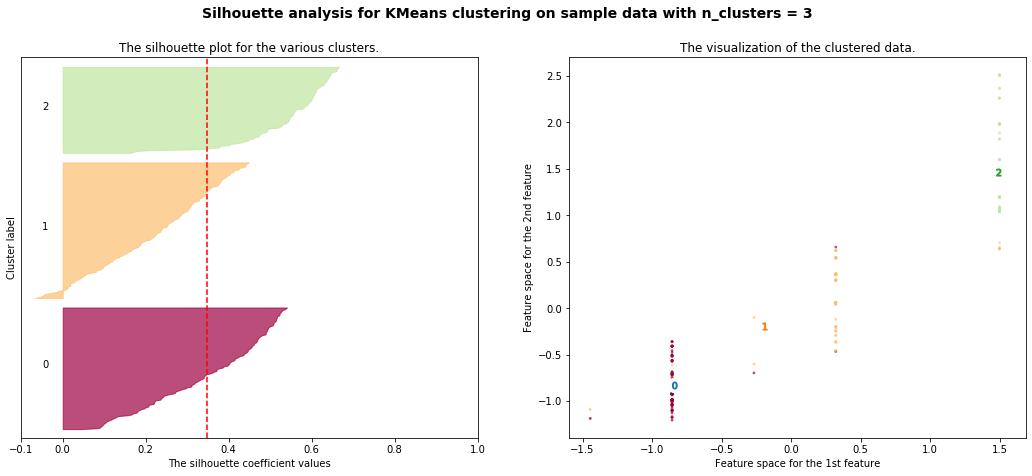

For n_clusters = 4 The average silhouette_score is : 0.35212732201043323


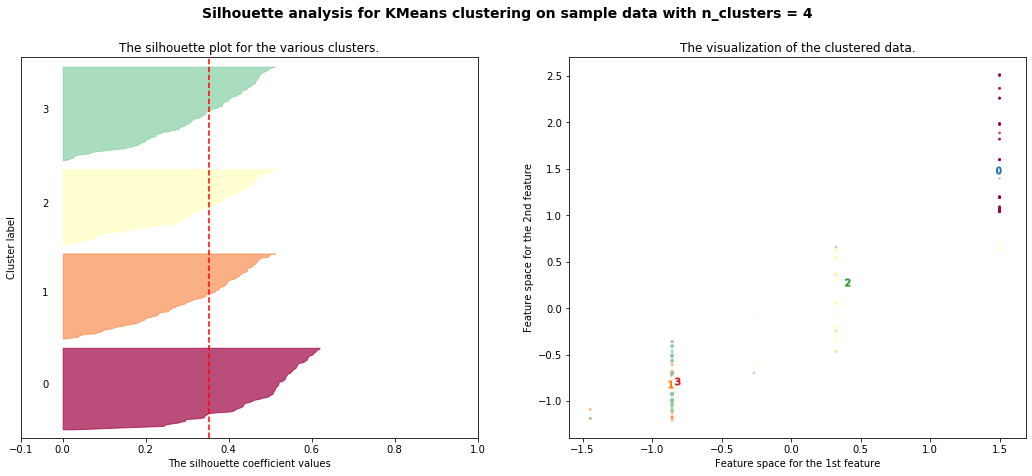

For n_clusters = 5 The average silhouette_score is : 0.3181057727100016


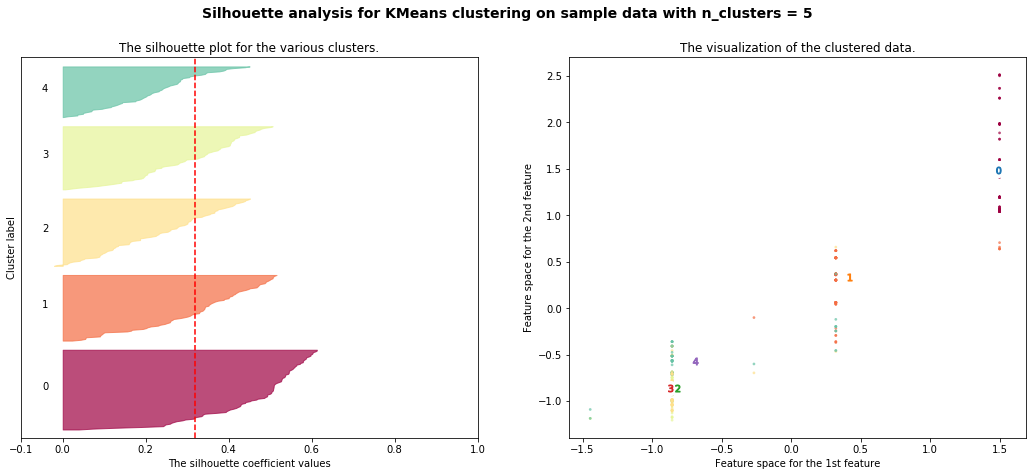

For n_clusters = 6 The average silhouette_score is : 0.2758183673611089


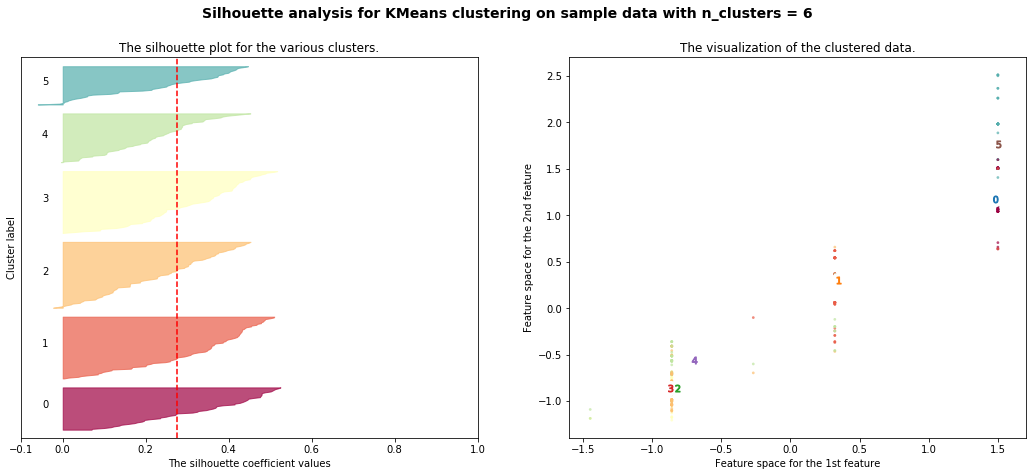

For n_clusters = 7 The average silhouette_score is : 0.28286590308594817


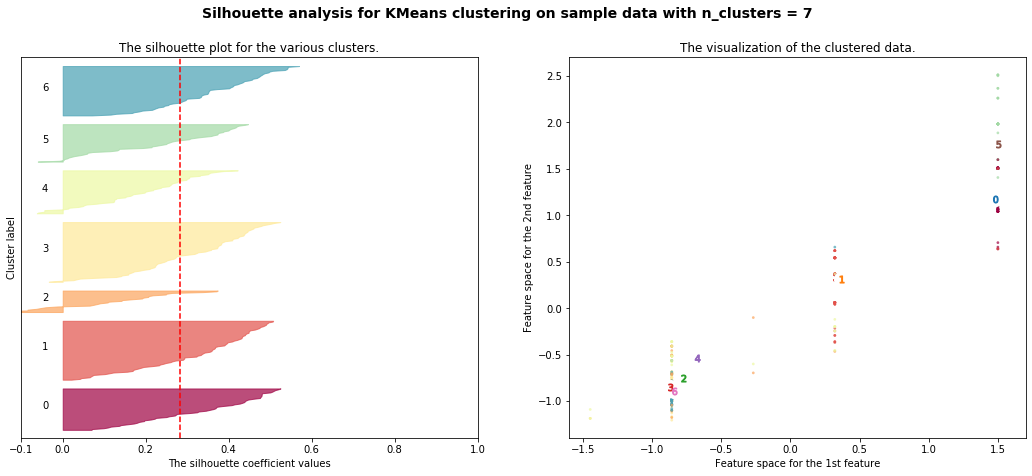

For n_clusters = 8 The average silhouette_score is : 0.2673474761521876


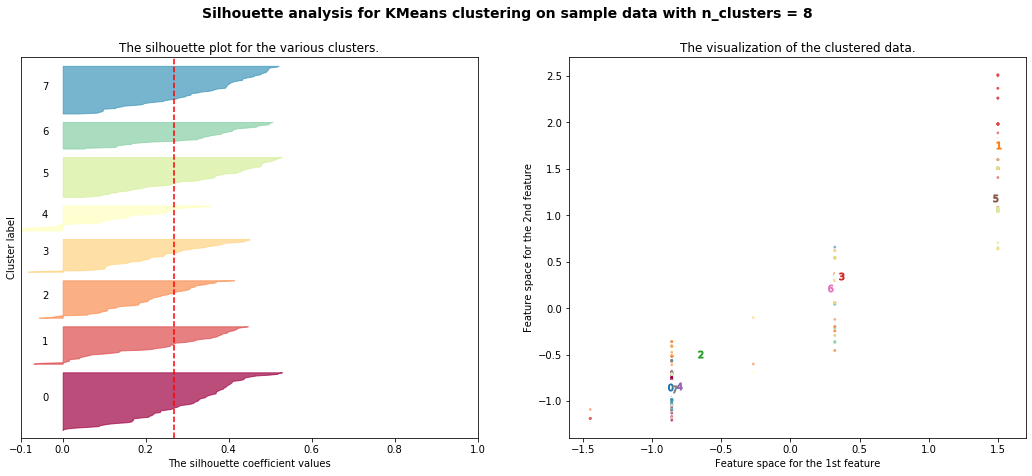

In [23]:
## from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)


X=df_scaled.values

range_n_clusters = [2, 3, 4, 5, 6,7,8]

for n_clusters in range_n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

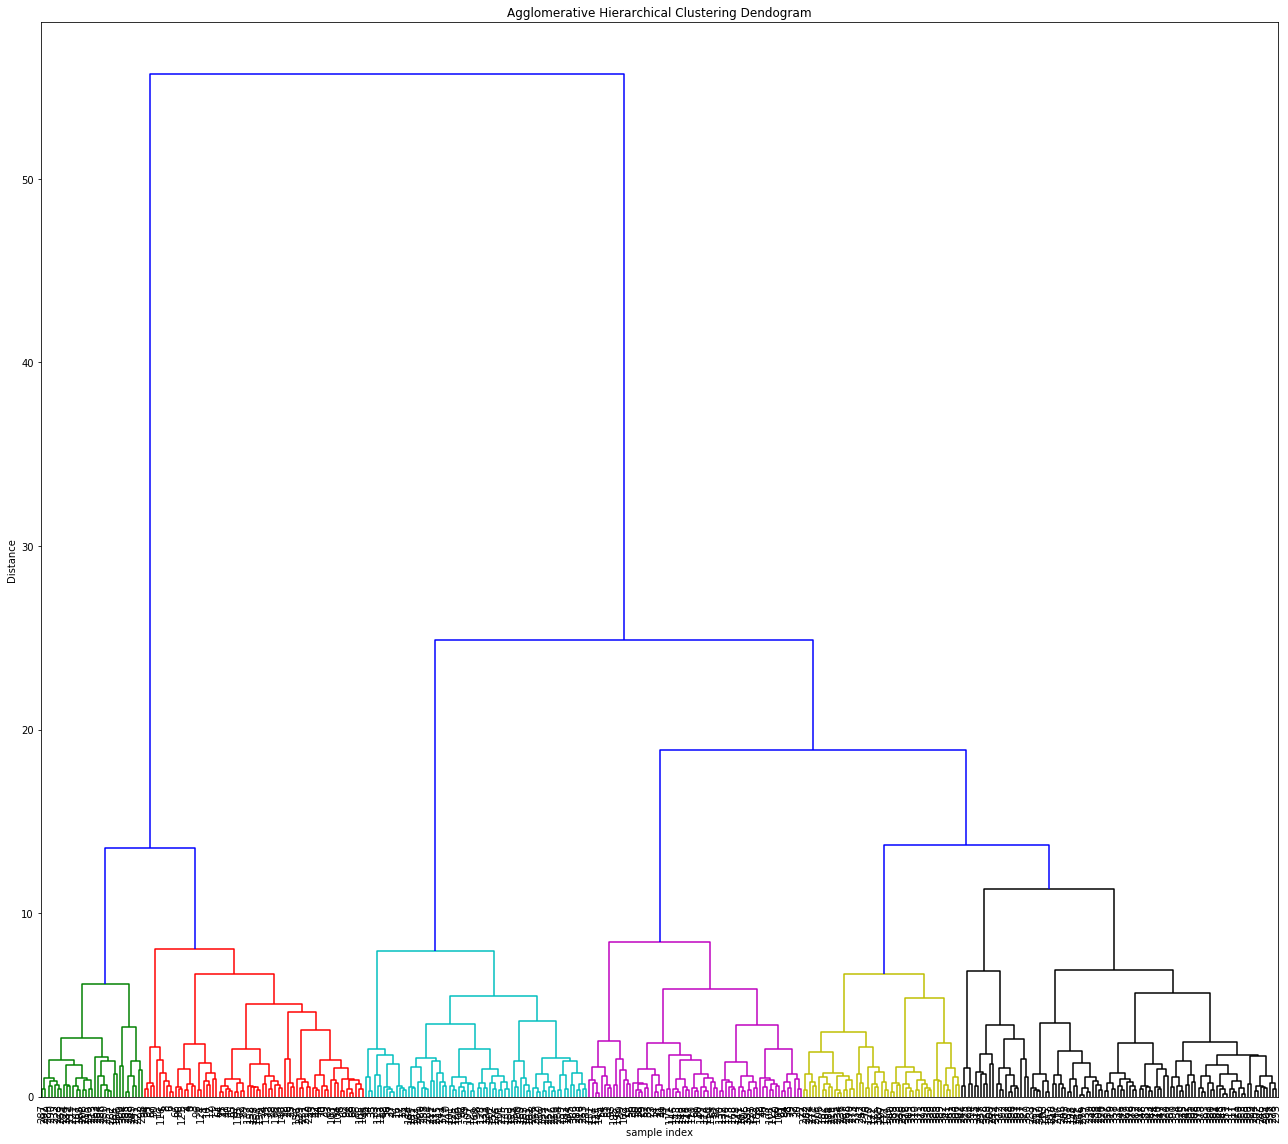

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=12,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [24]:
kmeans = KMeans(n_clusters=4, random_state=2)

In [25]:
predicted = kmeans.fit_predict(df_scaled)
predicted 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       3, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 3, 3, 3, 0,
       3, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 3, 3, 3, 3, 2,
       0, 0, 3, 3, 3, 3, 3, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 0, 2, 3, 3, 2, 2, 3, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 2, 3, 2,

In [26]:
df_scaled['cluster'] = predicted
df_scaled.head()
df_scaled.cluster.unique()
df_scaled


,cyl,disp,hp,wt,acc,yr,mpg,cluster
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,1
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,1
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439,1
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647,1
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,1
5,1.498191,2.262118,2.454408,1.620492,-2.021656,-1.627426,-1.090751,1
6,1.498191,2.502182,3.030708,1.635863,-2.384735,-1.627426,-1.218855,1
7,1.498191,2.367746,2.899730,1.586204,-2.566274,-1.627426,-1.218855,1
8,1.498191,2.511784,3.161685,1.719809,-2.021656,-1.627426,-1.218855,1
9,1.498191,1.887617,2.244844,1.039961,-2.566274,-1.627426,-1.090751,1


In [27]:
df0 = df_scaled[df_scaled.cluster==0]
df1 = df_scaled[df_scaled.cluster==1]
df2 = df_scaled[df_scaled.cluster==2]
df3 = df_scaled[df_scaled.cluster==3]

# Linear Regression 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [32]:
dataframes = ['df0','df1', 'df2', 'df3']
i = 0
for data_frame in dataframes:
    
    
    X = df3.drop(['mpg','cluster'],axis=1)
    Y = df3[['mpg']]    
    # Split X and y into training and test set in 80:20 ratio
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20 , random_state=1)
    regression_model = LinearRegression()
    regression_model.fit(X_train, Y_train)   
    print ("----------------------------------------------------")
    print("Coefficients for Cluster",i)
    print ("----------------------------------------------------")
    
    for idx, col_name in enumerate(X_train.columns):
        print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

    regression_model.score(X_test, Y_test)
    i = i + 1
    

----------------------------------------------------
Coefficients for Cluster 0
----------------------------------------------------
The coefficient for cyl is 0.96663535693891
The coefficient for disp is 0.023335354253247436
The coefficient for hp is -0.23237712669485533
The coefficient for wt is -0.9935156637955657
The coefficient for acc is 0.15276027570164255
The coefficient for yr is 0.3168491917531614
----------------------------------------------------
Coefficients for Cluster 1
----------------------------------------------------
The coefficient for cyl is 0.96663535693891
The coefficient for disp is 0.023335354253247436
The coefficient for hp is -0.23237712669485533
The coefficient for wt is -0.9935156637955657
The coefficient for acc is 0.15276027570164255
The coefficient for yr is 0.3168491917531614
----------------------------------------------------
Coefficients for Cluster 2
----------------------------------------------------
The coefficient for cyl is 0.96663535693891
T